[(126, 305, 216, 215), (66, 534, 156, 444), (72, 370, 146, 295), (32, 446, 94, 384), (39, 182, 168, 53)]


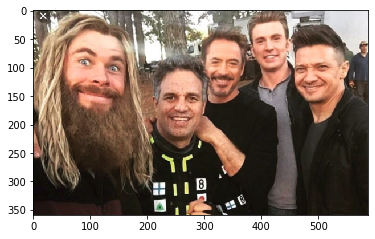

In [23]:
import cv2
import face_recognition
import matplotlib.pyplot as plt

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV 默认使用 BGR 通道加载图像，转换为 RGB 图像
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

imagePath = "images/marvel_002.png"
image = load_image(imagePath)
face_locations = face_recognition.face_locations(image)

print(face_locations)

for location in face_locations:
    top, right, bottom, left = location
    # cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    
plt.imshow(image)
plt.show()

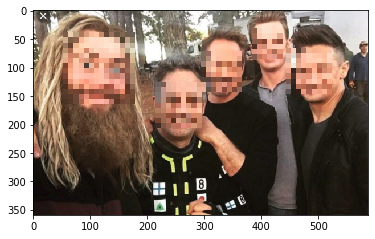

In [22]:
def do_mosaic(img, x, y, w, h, neighbor=9):
    fh, fw = img.shape[0], img.shape[1]
    if (y + h > fh) or (x + w > fw):
        return
    for i in range(0, h - neighbor, neighbor):
        for j in range(0, w - neighbor, neighbor):
            rect = [j + x, i + y, neighbor, neighbor]
            color = img[i + y][j + x].tolist()
            left_up = (rect[0], rect[1])
            right_down = (rect[0] + neighbor - 1, rect[1] + neighbor - 1)
            cv2.rectangle(img, left_up, right_down, color, -1)

image = load_image(imagePath)
for location in face_locations:
    top, right, bottom, left = location
    do_mosaic(image, left, top, right - left, bottom - top)

plt.imshow(image, cmap="gray")
plt.show()    